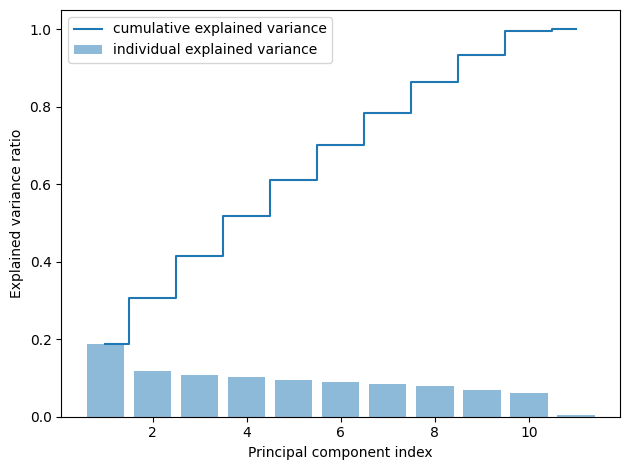

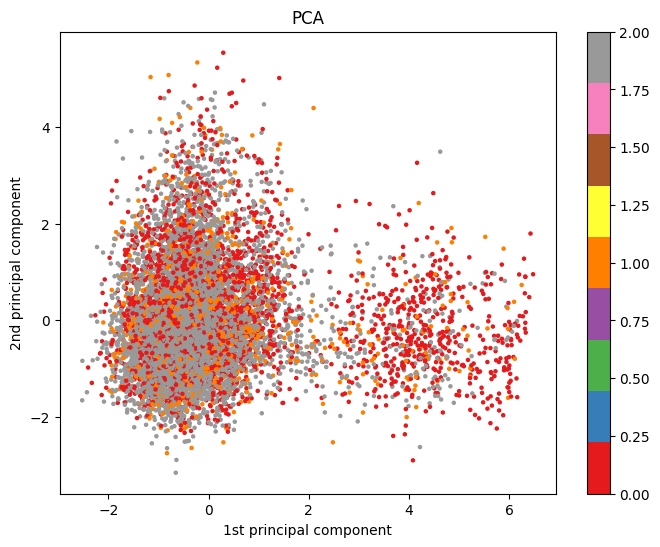

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv("../preprocessed.csv", na_filter=True, keep_default_na=False, na_values=[''])

features = df.iloc[:, :-1] 

# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

# PCA

n_components=11
pca = PCA(n_components=n_components)
features_pca = pca.fit_transform(features)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# scree plot
plt.bar(range(1, 12), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 12), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df.iloc[:, -1], cmap=plt.cm.Set1, s=5)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title("PCA")
# color and label
plt.colorbar()
plt.show()

In [ ]:
# Kmeans clustering, show inertia, silhouette score, purity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import accuracy_score

df = pd.read_csv("../preprocessed.csv", na_filter=True, keep_default_na=False, na_values=[''])
x = df.iloc[:, :-1]

# Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x)


/home/jaezic/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
import numpy as np
from sklearn import metrics


def purity_score(y_true, y_pred):
    # compute contingency matrix (i.e., confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true,
    y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
# show inertia, silhouette score, purity
print("K-means Clustering Quality Evaluation")
print(" inertia: {:.3f}\n silhouette score: {:.3f}\n purity: {:.3f}".format(kmeans.inertia_, silhouette_score(x, kmeans.labels_), purity_score(df.iloc[:, -1], kmeans.labels_)))

K-means Clustering Quality Evaluation
 inertia: 86810.531
 silhouette score: 0.126
 purity: 0.559
